In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data=load_breast_cancer()
X=data.data
y=data.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [26]:
train_acc=accuracy_score(y_train,dt.predict(x_train))
test_acc=accuracy_score(y_test,dt.predict(x_test))
print("accuracy:\n1.train accuracy:",train_acc,"\n2.test accuracy",test_acc)

cv_val_score=cross_val_score(dt,X,y,cv=5)
print("cv score:",cv_val_score)
print("average cv score:",np.mean(cv_val_score))
print("std:",np.std(cv_val_score))



accuracy:
1.train accuracy: 1.0 
2.test accuracy 0.951048951048951
cv score: [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
average cv score: 0.9173420276354604
std: 0.02419491828674519


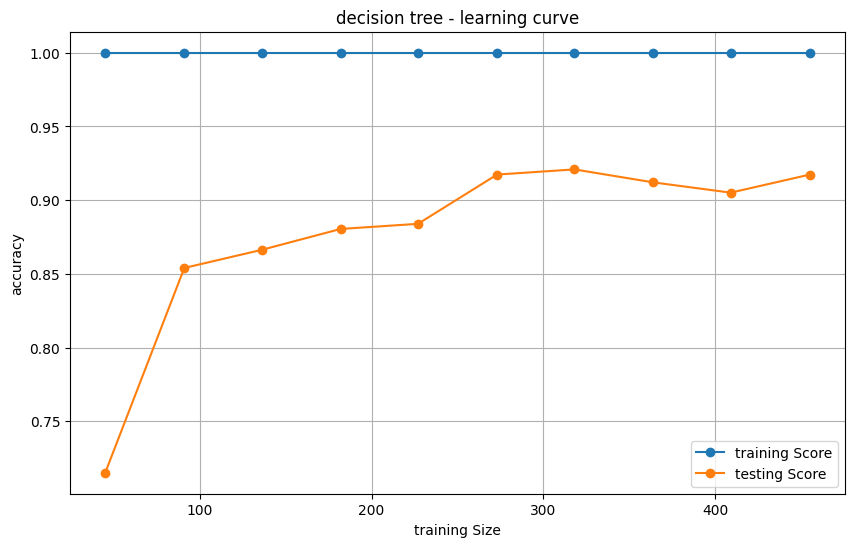

In [25]:
train_size,train_score_dt,test_score_dt=learning_curve(dt,X,y,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,10),random_state=42)

plt.figure(figsize=(10,6))
plt.plot(train_size,np.mean(train_score_dt,axis=1),'o-', label='training Score')
plt.plot(train_size,np.mean(test_score_dt,axis=1),'o-', label='validation Score')
plt.title("decision tree - learning curve")
plt.xlabel("training Size")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [20]:
train_acc=accuracy_score(y_train,bagging_clf.predict(x_train))
test_acc=accuracy_score(y_test,bagging_clf.predict(x_test))
print("accuracy:\n1.train accuracy:",train_acc,"\n2.test accuracy",test_acc)

cv_val_score=cross_val_score(bagging_clf,X,y,cv=5)
print("cv score:",cv_val_score)
print("average cv score:",np.mean(cv_val_score))



accuracy:
1.train accuracy: 1.0 
2.test accuracy 0.958041958041958
cv score: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]
average cv score: 0.9578947368421054


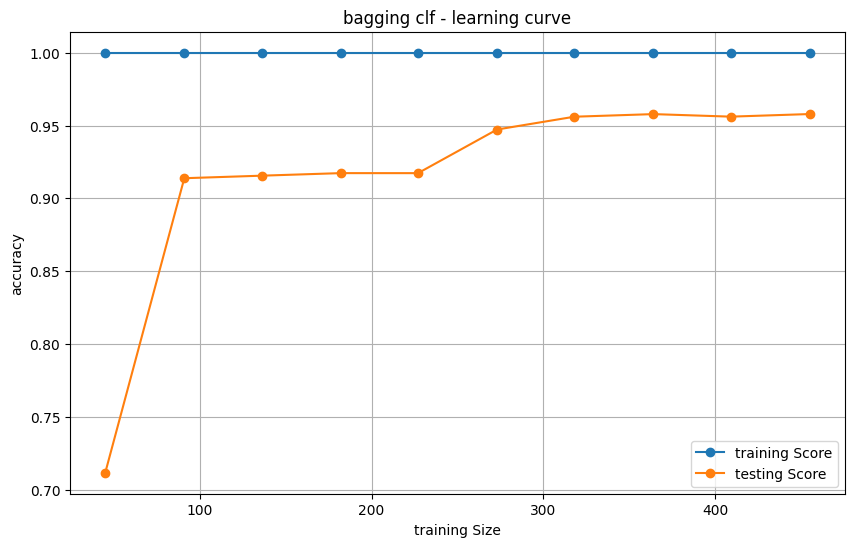

In [24]:
train_size,train_score_bc,test_score_bc=learning_curve(bagging_clf,X,y,cv=5,scoring='accuracy',train_sizes=np.linspace(0.1,1.0,10),random_state=42)

plt.figure(figsize=(10,6))
plt.plot(train_size,np.mean(train_score_bc,axis=1),'o-', label='training Score')
plt.plot(train_size,np.mean(test_score_bc,axis=1),'o-', label='validation Score')
plt.title("bagging clf - learning curve")
plt.xlabel("training Size")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()